In [2]:
import librosa
import torchaudio
import torch
import numpy as np
import matplotlib as plt
from speechbrain.pretrained import EncoderClassifier

encoder = EncoderClassifier.from_hparams(source="speechbrain/spkrec-ecapa-voxceleb")

/work/dpandya/miniconda3/envs/irsolve/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/work/dpandya/miniconda3/envs/irsolve/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c104cuda20CUDACachingAllocator9allocatorE'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [62]:
import seaborn as sns
audio_file = 'Signals/Bdb001/Bdb001.interaction.wav'

aud, sr = librosa.load(audio_file,sr=16000)
t_30 = 330*sr
aud_mfcc = librosa.feature.mfcc(y=aud[t_30:(t_30+30*sr)], sr=sr, n_mfcc=13)
aud_ton = librosa.feature.tonnetz(y=aud[t_30:(t_30+30*sr)],sr=sr)
#aud_mfcc = librosa.feature.mfcc(y=aud[0:t_30], sr=sr, n_mfcc=18)

#sns.displot(aud_mfcc[0])
#plt.plot([i for i in range(0,len(aud[t_30:(t_30+30*sr)]))], aud[t_30:(t_30+30*sr)])


In [78]:
import torchaudio.functional as F
aud_tensor = torch.from_numpy(aud[t_30:(t_30+30*sr)]).unsqueeze(0)

pitch = F.detect_pitch_frequency(aud_tensor, sr)

torch.Size([1, 2985])


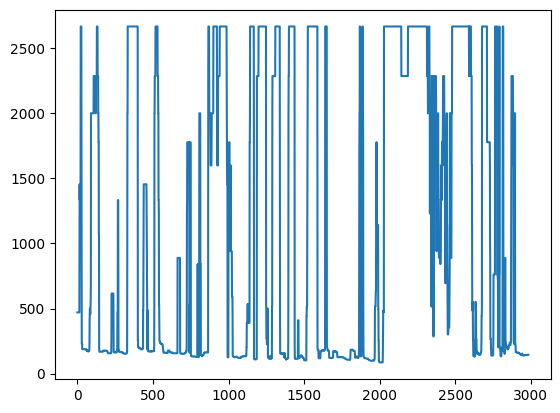

In [81]:
print(pitch.shape)

#sns.scatterplot(pitch.squeeze().numpy())
plt.plot([i for i in range(0,pitch.shape[1])], pitch.squeeze().numpy())

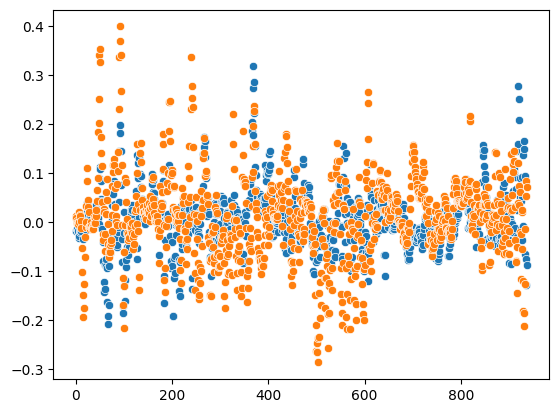

In [75]:
import numpy as np

for i in range(0, aud_ton.shape[0],3):
    #print(i.shape)
    #print(np.mean(aud_ton[i]), np.std(aud_ton[i]))
    sns.scatterplot(aud_ton[i])

In [11]:
t_30 = sr*30
t_40 = sr*10

embedding0 = encoder.encode_batch(torch.from_numpy(aud[46*t_30 : (48*t_30)]))
embedding1 = encoder.encode_batch(torch.from_numpy(aud[0:(t_40)]))

print(embedding0.shape, embedding1.shape)

torch.Size([1, 1, 192]) torch.Size([1, 1, 192])


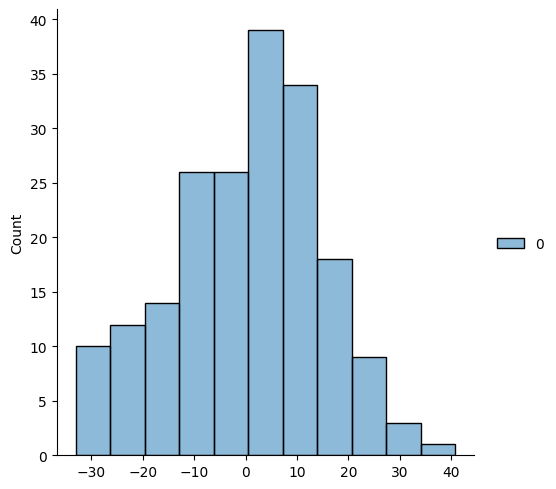

In [12]:
sns.displot(embedding0.squeeze().numpy().reshape(-1,1))

<Axes: >

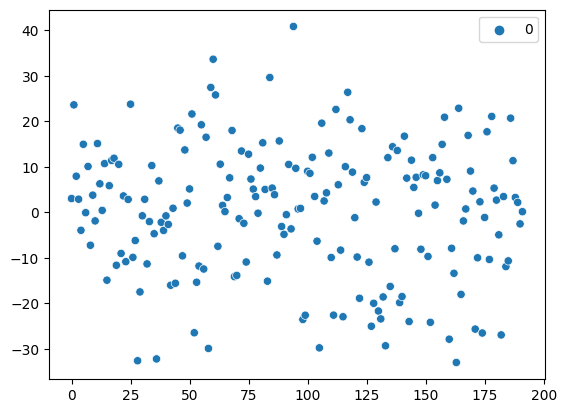

In [13]:
sns.scatterplot(embedding0.squeeze().numpy().reshape(-1,1))

In [30]:
from sklearn.cluster import SpectralClustering, DBSCAN, OPTICS

cluster_obj = SpectralClustering(n_clusters=6)
db_scan_obj = DBSCAN(eps=2,min_samples=1)
optics_obj = OPTICS(min_samples=3)

clusters = cluster_obj.fit((embedding0.squeeze().numpy().reshape(-1,1)))
#clusters_dbscan = db_scan_obj.fit((embedding0.squeeze().numpy().reshape(-1,1)))
clusters_optics_preds = optics_obj.fit((embedding0.squeeze().numpy().reshape(-1,1)))

/tmp/ipykernel_3207523/2958522260.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding0.squeeze().squeeze().numpy(), optics_preds.labels_, cmap = 'RdBu')


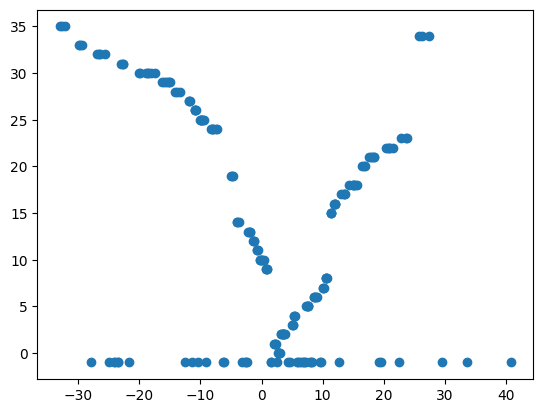

In [31]:
clusters_preds = cluster_obj.fit_predict(embedding0.squeeze().numpy().reshape(-1,1))
#clusters_dbscan = db_scan_obj.fit_predict((embedding0.squeeze().numpy().reshape(-1,1)))
optics_preds = optics_obj.fit(embedding0.squeeze().numpy().reshape(-1,1)) 
#clusters_preds
import matplotlib.pyplot as plt

plt.scatter(embedding0.squeeze().squeeze().numpy(), optics_preds.labels_, cmap = 'RdBu')
#plt.scatter(range(0,len(clusters_preds)), clusters_preds, cmap = 'RdBu')